### Import Lib

In [31]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


### Data Collection & EDA

In [32]:
dt = pd.read_csv(r"C:\Users\pascal\Desktop\New Projects\Mall Customer Segmentation Data\archive\Mall_Customers.csv")
dt.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
#no of rows and columns
dt.shape

(200, 5)

In [34]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
dt.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:
# Rename columns for easier access
dt.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income_k$', 'Spending_Score_1-100']

# Verify the changes
dt.head()


,CustomerID,Gender,Age,Annual_Income_k$,Spending_Score_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


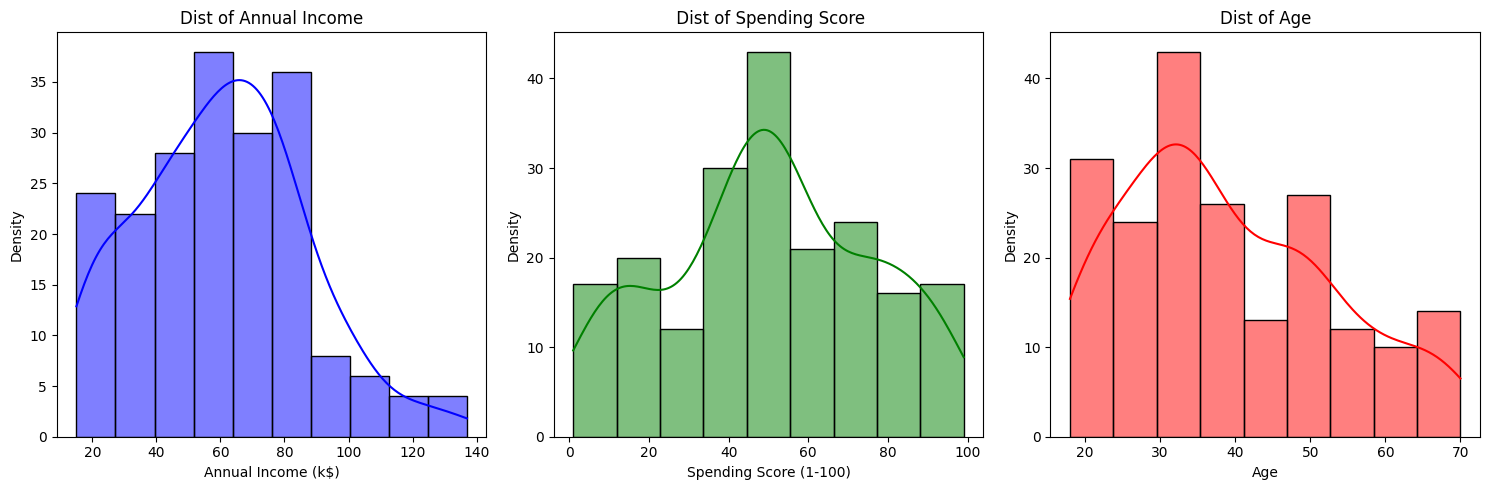

In [37]:

# distribution for Annual_Income,Spending_Score, and Age
plt.figure(figsize=(15, 5))

# Annual Income density plot
plt.subplot(1, 3, 1)
sns.histplot(dt['Annual_Income_k$'], kde=True, color='blue')
plt.title('Dist of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')

# Spending Score density plot
plt.subplot(1, 3, 2)
sns.histplot(dt['Spending_Score_1-100'], kde=True, color='green')
plt.title(' Dist of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')

# Age density plot
plt.subplot(1, 3, 3)
sns.histplot(dt['Age'], kde=True, color='red')
plt.title('Dist of Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Choosing Relevenat Features 

In [38]:
# Select relevant columns for clustering
X = dt[['Annual_Income_k$', 'Spending_Score_1-100']]
X.head()

,Annual_Income_k$,Spending_Score_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [39]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Scaling is important because K-Means uses distance (usually Euclidean) to assign data points to clusters. If features like Annual Income have much larger values than Spending Score or Age, they will dominate the distance calculation, leading to biased clusters. Scaling ensures all features contribute equally, improving the clustering accuracy.

In [40]:
print(X_scaled)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

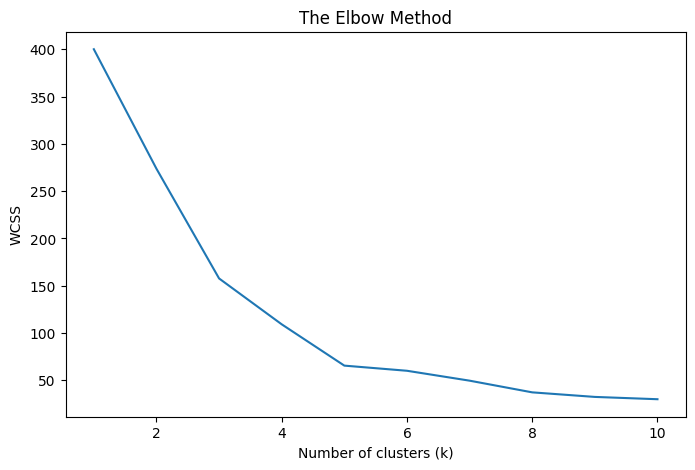

In [41]:
# List to hold the WCSS values
wcss = []

# Loop over different values of k (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS for each model

# Plot the WCSS values
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

The elbow point is typically the most significant drop in WCSS. In this plot, the decrease in WCSS slows down considerably after 3 clusters making it a strong candidate. However, after 4 clusters, the curve also flattens out further, indicating that increasing the number of clusters beyond 4 doesn't provide much additional 
reduction in WCSS. 4 clusters might also be a good option but lets check bu calculating the silhouette score




### Compute silhouette scores

In [42]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Initialize KMeans for 3 ,4  and 5 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the models
kmeans_3.fit(X_scaled)
kmeans_4.fit(X_scaled)
kmeans_5.fit(X_scaled)

# Predict the clusters
labels_3 = kmeans_3.labels_
labels_4 = kmeans_4.labels_
labels_5 = kmeans_5.labels_

# Calculate the silhouette scores
silhouette_score_3 = silhouette_score(X_scaled, labels_3)
silhouette_score_4 = silhouette_score(X_scaled, labels_4)
silhouette_score_5 = silhouette_score(X_scaled, labels_5)

print(f"Silhouette Score for 3 clusters: {silhouette_score_3}")
print(f"Silhouette Score for 4 clusters: {silhouette_score_4}")
print(f"Silhouette Score for 5 clusters: {silhouette_score_5}")



Silhouette Score for 3 clusters: 0.46658474419000145
Silhouette Score for 4 clusters: 0.49434988482196784
Silhouette Score for 5 clusters: 0.5546571631111091


#### Interpretation:
Higher silhouette scores indicate better-defined and more distinct clusters.
As we see here, the silhouette score improves as the number of clusters increases, with 5 clusters providing the highest score of 0.5547.


Since the silhouette score is highest for 5 clusters, this suggests that 5 clusters provide the best separation and structure for the data based on the features selected.

### Model Training With 5 Clusters

In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Initialize the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the K-Means model
kmeans.fit(X_scaled)

# Retrieve cluster labels
cluster_labels = kmeans.labels_

# Evaluate metrics
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
cluster_sizes = pd.Series(cluster_labels).value_counts()

# Display the results
print(f"Inertia (WCSS): {inertia}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Cluster Sizes:\n{cluster_sizes}")

Inertia (WCSS): 65.5684081557168
Silhouette Score: 0.5546571631111091
Davies-Bouldin Score: 0.5722356162263352
Calinski-Harabasz Index: 248.64932001536357
Cluster Sizes:
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [44]:
# Add the cluster labels back to  original DataFrame
dt['Cluster'] = cluster_labels
dt.head()

,CustomerID,Gender,Age,Annual_Income_k$,Spending_Score_1-100,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [45]:
print(cluster_labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


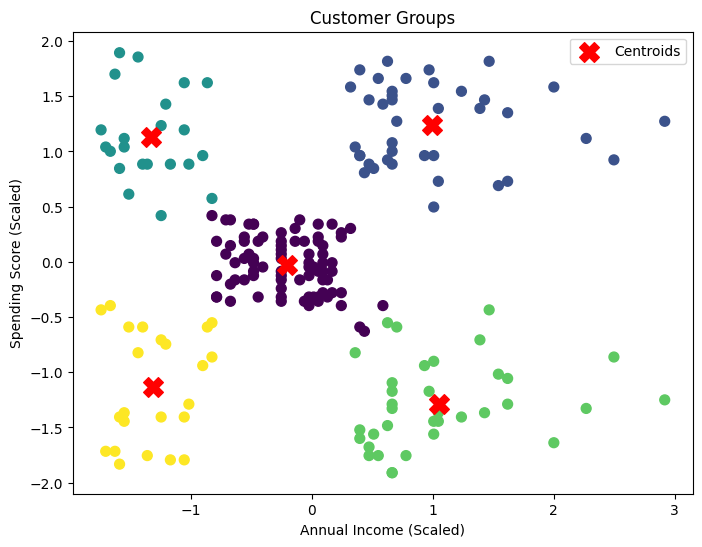

In [52]:
import matplotlib.pyplot as plt

# Select two features to plot (Annual Income and Spending Score in this case)
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Add labels and title
plt.title('Customer Groups')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()


In [49]:
# Add the cluster labels back to the original DataFrame
dt['Cluster'] = cluster_labels

# Select numeric columns, excluding CustomerID
numeric_columns = dt.drop(['CustomerID', 'Gender'], axis=1).select_dtypes(include=[float, int])

# Calculate the mean for each cluster
cluster_summary = numeric_columns.groupby(dt['Cluster']).mean()

# Display the summary
print(cluster_summary)


               Age  Annual_Income_k$  Spending_Score_1-100  Cluster
Cluster                                                            
0        42.716049         55.296296             49.518519      0.0
1        32.692308         86.538462             82.128205      1.0
2        25.272727         25.727273             79.363636      2.0
3        41.114286         88.200000             17.114286      3.0
4        45.217391         26.304348             20.913043      4.0


Business Recommendations for a Fictional Big Mall Based on Cluster Analysis:
With the segmentation insights you’ve gained, you can develop tailored strategies to optimize customer engagement and sales. Here are specific recommendations for each customer cluster:

Cluster 0: Average Customers (Middle-aged, Moderate Income, Moderate Spending)
Strategy: Focus on increasing customer retention and loyalty.
Loyalty Programs: Introduce or enhance loyalty programs to reward regular customers for their spending habits, encouraging them to shop more frequently.
Seasonal Offers: These customers are moderately engaged, so timely discounts during festive seasons or special events can boost their spending.
Convenience: Offering a seamless shopping experience, such as easy returns, in-store services, and exclusive deals for loyal customers, can increase their satisfaction.
Cluster 1: Premium Customers (Young, High Income, High Spending)
Strategy: Focus on personalization and premium experiences to retain these high-value customers.
Exclusive Offers: Provide early access to new and premium products, invite them to exclusive events, or give VIP treatment (e.g., personal shopping assistants).
Luxury Brands and Experiences: Promote luxury items, high-end services, and experiences such as fine dining, spas, or concierge services that appeal to their lifestyle.
Upselling: Introduce complementary premium products or services to encourage them to increase their spending further.
Cluster 2: Young Spenders (Young, Low Income, High Spending)
Strategy: Appeal to their spending habits with cost-effective but trendy products.
Trend-Focused Marketing: Promote trendy and budget-friendly items, such as fashion-forward clothing or affordable tech gadgets, which appeal to their preferences.
Payment Plans: Offer installment plans or flexible payment options to encourage larger purchases despite their lower income.
Social Media Campaigns: Target this group with social media-driven marketing campaigns, influencer partnerships, and limited-time online offers that create a sense of urgency.
Cluster 3: Affluent Savers (Middle-aged, High Income, Low Spending)
Strategy: Encourage more frequent visits and higher spending by appealing to their value-conscious nature.
Value-Based Promotions: Offer personalized deals on premium products they might typically avoid due to price. Highlight value-for-money offers in luxury categories (e.g., high-quality electronics, home goods).
Financial Services: This group may be interested in financial products, such as investment opportunities, savings plans, or exclusive offers for major purchases.
Exclusive Memberships: Introduce membership programs that offer long-term savings on big purchases, which align with their more conservative spending patterns.
Cluster 4: Budget-Conscious Shoppers (Older, Low Income, Low Spending)
Strategy: Focus on driving value and affordability for this group.
Discounts and Bargains: Tailor promotions around deep discounts, bulk purchases, and value-for-money products (e.g., discounted groceries, affordable clothing, etc.).
Senior Discounts: If the demographic is primarily older, implement senior citizen discounts or special offers on essential products like healthcare and home essentials.
Partnerships with Discount Retailers: Consider stocking brands or partnering with stores that specialize in budget-conscious products.
General Recommendations:
Omni-Channel Strategy: Ensure a strong online presence with personalized recommendations for each segment. Use data-driven insights to create targeted online ads, personalized email marketing, and promotions.

Data-Driven Marketing: Leverage the clustering insights to deliver segmented marketing campaigns. For example:

Cluster 1 (Premium Customers): Focus on email campaigns with new arrivals or limited-edition products.
Cluster 4 (Budget-Conscious): Send SMS notifications about upcoming sales or discounts.
In-Store Experience: Tailor the in-store experience to each segment. For premium customers (Cluster 1), offer personalized services and special in-store promotions, while for budget-conscious customers (Cluster 4), ensure clear signage of discounts and affordable products.

Partnerships and Collaborations: Use cluster insights to forge partnerships with relevant brands or services. For example, Cluster 3 might be more attracted to long-term value partnerships (e.g., high-quality electronics or financial services), while Cluster 2 may prefer trendy, fast-fashion brands.

In [53]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']